# House Price Prediction

This is a project in Kaggle (https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview). The objective is to predict sales prices and practice feature engineering, RFs, and gradient boosting.

## 1 Understand Data

In [89]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler #Normalize the features (x) individually

import warnings
warnings.filterwarnings('ignore') # remove warnings


In [90]:
data_train = pd.read_csv('Data/train.csv')
data_test = pd.read_csv('Data/test.csv')

In [91]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 2 Analyze Data

In [92]:
# 1. Analyze numerical data

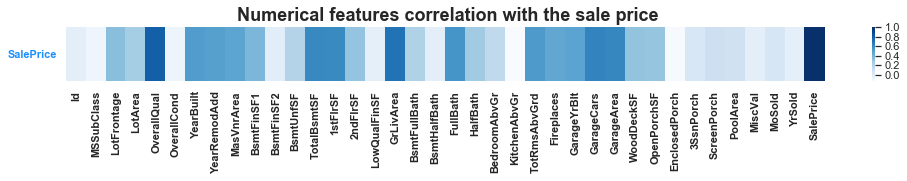

In [93]:
# # correlation matrix
# corrmat = data_train.corr()
# f,ax=plt.subplots(figsize=(20,9))
# sns.heatmap(corrmat, vmax=0.8, square=True)

num=data_train.select_dtypes(exclude='object')
numcorr=num.corr()
f,ax=plt.subplots(figsize=(17,1))
sns.heatmap(numcorr.sort_values(by=['SalePrice'], ascending=False).head(1), cmap='Blues')
plt.title(" Numerical features correlation with the sale price", weight='bold', fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)


plt.show()

In [94]:
Num=numcorr['SalePrice'].sort_values(ascending=False).head(10).to_frame()

cm = sns.light_palette("cyan", as_cmap=True)

s = Num.style.background_gradient(cmap=cm)
s

,SalePrice
SalePrice,1
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


The features that affect SalePrice are: **OverallQual, GrLivArea/GarageArea, GarageCars, TotalBsmtSF/1stFlrSF, FullBath, TotRmsAbvGrd, YearBuilt**. All of them are reasonable. eg: Higher Qual, higher price.
- GarageCars & GarageArea are closely related, so I will only keep one.
- "TotalBsmtSF" & "1stFlrSF" are also similar, do I will only keep the 1stFlrSF in case one house does not have a basement.

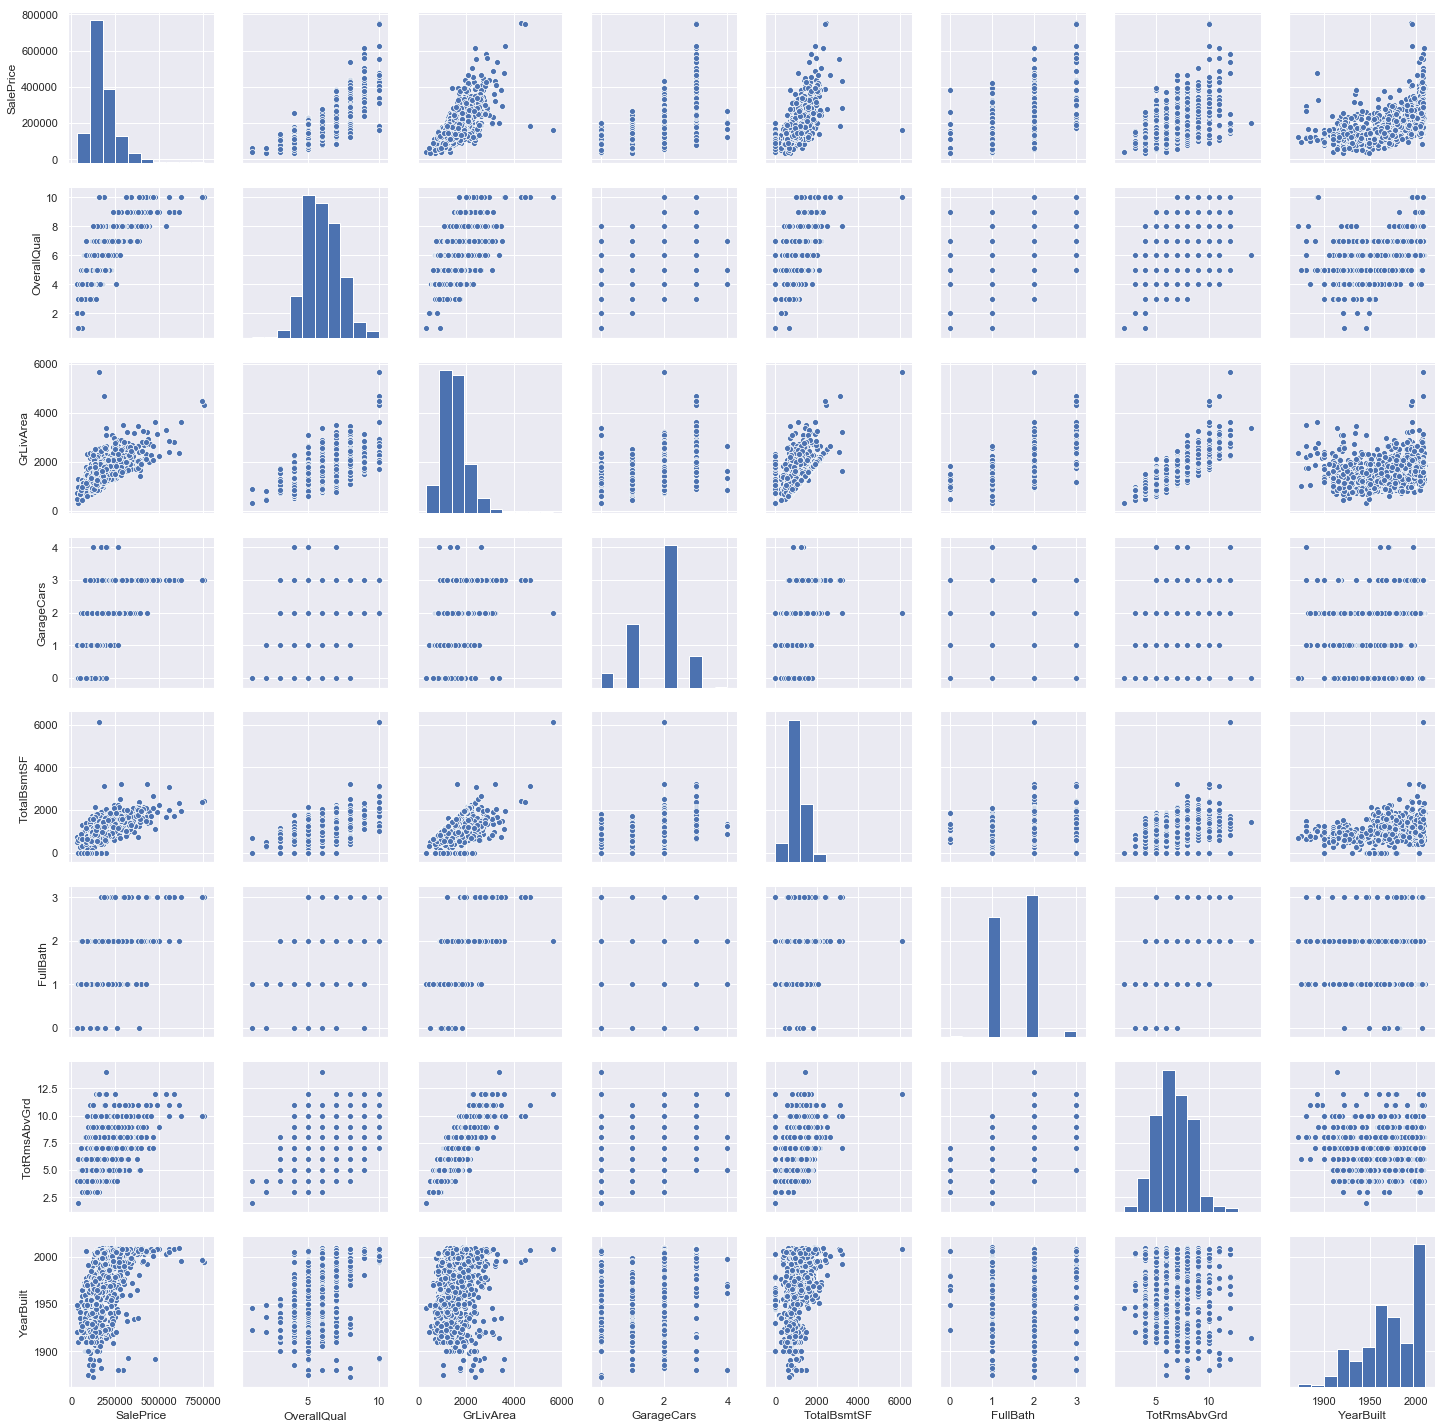

In [95]:
# scatterplot
sns.set()
cols=['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','TotRmsAbvGrd','YearBuilt']
sns.pairplot(data_train[cols], size=2.5)
plt.show()

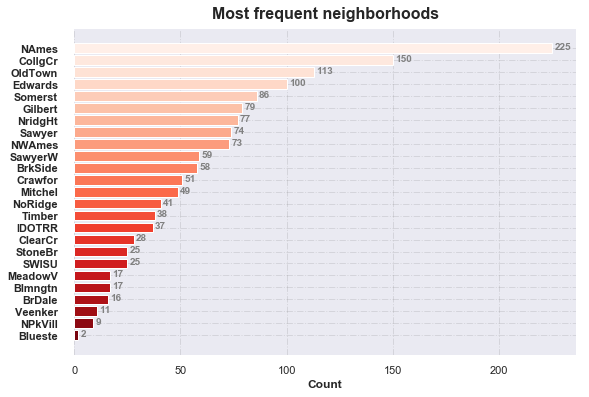

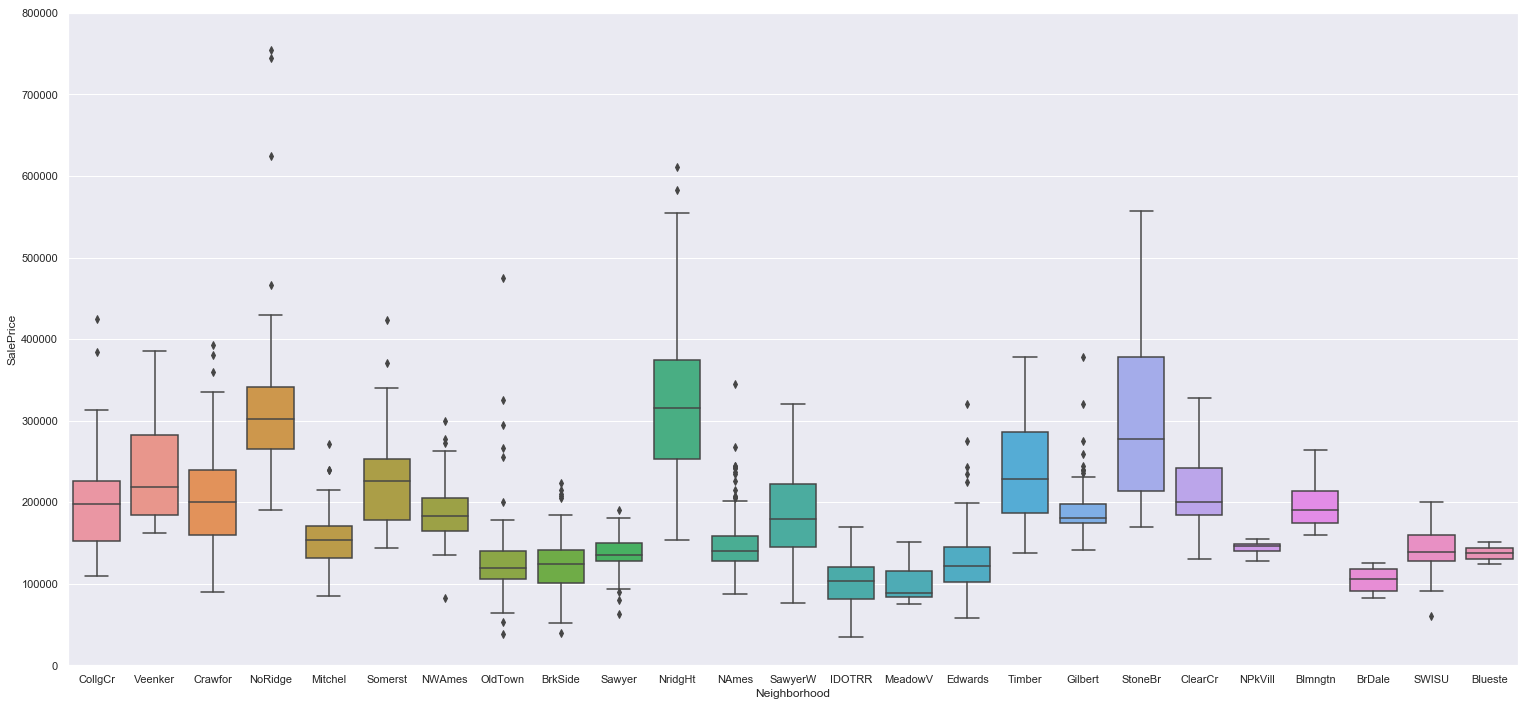

In [96]:
# 2. Analyze categorical data
# Neighborhood

# Figure Size
fig, ax = plt.subplots(figsize=(9,6))

# Horizontal Bar Plot
title_cnt=data_train['Neighborhood'].value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], color=sns.color_palette('Reds',len(title_cnt)))

# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.2)

# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Most frequent neighborhoods',weight='bold',
             loc='center', pad=10, fontsize=16)
ax.set_xlabel('Count', weight='bold')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')

# Show Plot
# plt.show()

# Neighborhood does affect price dramatically, so I will keep it.
var = 'Neighborhood'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1)
f, ax = plt.subplots(figsize=(26, 12))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

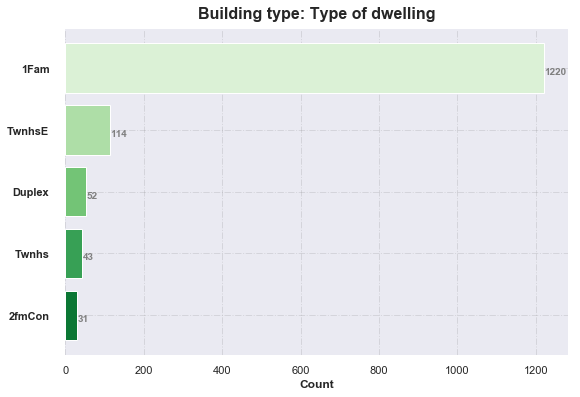

In [97]:
# BuildingType

fig, ax = plt.subplots(figsize=(9,6))

# Horizontal Bar Plot
title_cnt=data_train['BldgType'].value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], color=sns.color_palette('Greens',len(title_cnt)))

# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.2)

# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Building type: Type of dwelling',weight='bold',
             loc='center', pad=10, fontsize=16)
ax.set_xlabel('Count', weight='bold')


# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')


plt.show()


## 3 Data Cleaning

In [98]:
# combine training and test data
TotalNumber_train = data_train.shape[0]
TotalNumber_test = data_test.shape[0]
y = data_train['SalePrice']

TrainTestAll = pd.concat((data_train, data_test), sort=False).reset_index(drop=True)

#Drop the target "SalePrice" and Id columns
TrainTestAll.drop(['SalePrice'], axis=1, inplace=True)
TrainTestAll.drop(['Id'], axis=1, inplace=True)
# print("Total size is :",TrainTestAll.shape)
y

0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
         ...  
1430    192140
1431    143750
1432     64500
1433    186500
1434    160000
1435    174000
1436    120500
1437    394617
1438    149700
1439    197000
1440    191000
1441    149300
1442    310000
1443    121000
1444    179600
1445    129000
1446    157900
1447    240000
1448    112000
1449     92000
1450    136000
1451    287090
1452    145000
1453     84500
1454    185000
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

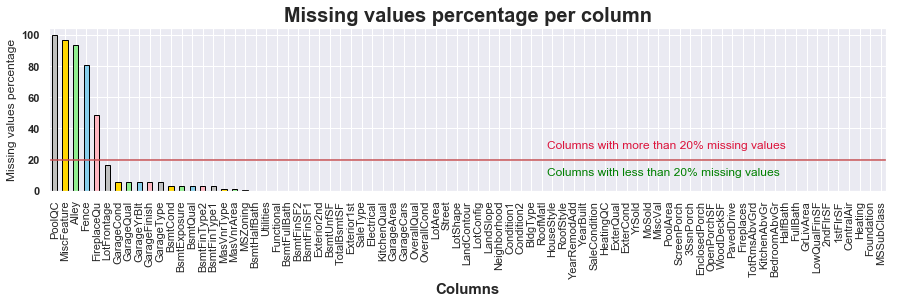

In [99]:
#1 Drop features with >80% missing values

def msv1(data, thresh=20, color='black', edgecolor='black', width=15, height=3):
    """
    SOURCE: https://www.kaggle.com/amiiiney/price-prediction-regularization-stacking
    """
    
    plt.figure(figsize=(width,height))
    percentage=(data.isnull().mean())*100
    percentage.sort_values(ascending=False).plot.bar(color=color, edgecolor=edgecolor)
    plt.axhline(y=thresh, color='r', linestyle='-')
    plt.title('Missing values percentage per column', fontsize=20, weight='bold' )
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+12.5, 'Columns with more than %s%s missing values' %(thresh, '%'), fontsize=12, color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 5, 'Columns with less than %s%s missing values' %(thresh, '%'), fontsize=12, color='green',
         ha='left' ,va='top')
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage')
    plt.yticks(weight ='bold')
    
    return plt.show()

msv1(TrainTestAll, 20, color=('silver', 'gold', 'lightgreen', 'skyblue', 'lightpink'))


In [100]:
#1 Drop features with >80% missing values

TrainTest=TrainTestAll.dropna(thresh=len(TrainTestAll)*0.8, axis=1)
print('We dropped ',TrainTestAll.shape[1]-TrainTest.shape[1], ' features in the combined set')

We dropped  5  features in the combined set


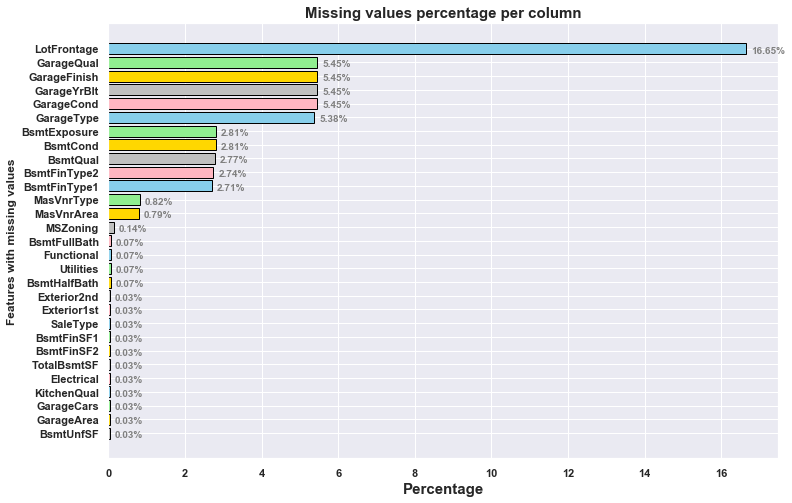

In [101]:
#2 Figure out how to treat missing values

allna = (TrainTest.isnull().sum() / len(TrainTest))*100
allna = allna.drop(allna[allna == 0].index).sort_values()

def msv2(data, width=12, height=8, color=('silver', 'gold','lightgreen','skyblue','lightpink'), edgecolor='black'):
    """
    SOURCE: https://www.kaggle.com/amiiiney/price-prediction-regularization-stacking
    """
    fig, ax = plt.subplots(figsize=(width, height))

    allna = (data.isnull().sum() / len(data))*100
    tightout= 0.008*max(allna)
    allna = allna.drop(allna[allna == 0].index).sort_values().reset_index()
    mn= ax.barh(allna.iloc[:,0], allna.iloc[:,1], color=color, edgecolor=edgecolor)
    ax.set_title('Missing values percentage per column', fontsize=15, weight='bold' )
    ax.set_xlabel('Percentage', weight='bold', size=15)
    ax.set_ylabel('Features with missing values', weight='bold')
    plt.yticks(weight='bold')
    plt.xticks(weight='bold')
    for i in ax.patches:
        ax.text(i.get_width()+ tightout, i.get_y()+0.1, str(round((i.get_width()), 2))+'%',
            fontsize=10, fontweight='bold', color='grey')
    return plt.show()

msv2(TrainTest)

In [102]:
#2 Figure out how to treat missing values

# isolate the missing values from the rest of the dataset to have a good idea of how to treat them

NA=TrainTest[allna.index.to_list()]

# split them to: Categorical features Numerical features

NAcat=NA.select_dtypes(include='object')
NAnum=NA.select_dtypes(exclude='object')
print('We have :',NAcat.shape[1],'categorical features with missing values')
print('We have :',NAnum.shape[1],'numerical features with missing values')

# we have to clean 18 categorical and 11 numerical features

We have : 18 categorical features with missing values
We have : 11 numerical features with missing values


In [103]:
#3 Fill numerical features first
#    - Look at the distribution
#    - Most can be filled with 0 assuming they don't exist. For example, GarageArea = 0 if the house lacks a garage.
#    - "GarageYrBlt" should be filled with '1980'
NAnum.head()

,BsmtUnfSF,GarageArea,GarageCars,TotalBsmtSF,BsmtFinSF2,BsmtFinSF1,BsmtHalfBath,BsmtFullBath,MasVnrArea,GarageYrBlt,LotFrontage
0,150.0,548.0,2.0,856.0,0.0,706.0,0.0,1.0,196.0,2003.0,65.0
1,284.0,460.0,2.0,1262.0,0.0,978.0,1.0,0.0,0.0,1976.0,80.0
2,434.0,608.0,2.0,920.0,0.0,486.0,0.0,1.0,162.0,2001.0,68.0
3,540.0,642.0,3.0,756.0,0.0,216.0,0.0,1.0,0.0,1998.0,60.0
4,490.0,836.0,3.0,1145.0,0.0,655.0,0.0,1.0,350.0,2000.0,84.0


In [104]:
#3 Fill numerical features first

#MasVnrArea: Masonry veneer area in square feet, the missing data means no veneer so we fill with 0
TrainTest['MasVnrArea']=TrainTest['MasVnrArea'].fillna(0)
#LotFrontage has 16% missing values. We fill with the median
TrainTest['LotFrontage']=TrainTest['LotFrontage'].fillna(TrainTest.LotFrontage.median())
#GarageYrBlt:  Year garage was built, we fill the gaps with the median: 1980
TrainTest['GarageYrBlt']=TrainTest["GarageYrBlt"].fillna(1980)
# For the rest of the columns: Bathroom, half bathroom, basement related columns and garage related columns:
# We will fill with 0s because they just mean that the house doesn't have a basement, bathrooms or a garage
TrainTest[['BsmtUnfSF', 'GarageArea', 'GarageCars', 'TotalBsmtSF', 'BsmtFinSF2',
       'BsmtFinSF1', 'BsmtHalfBath', 'BsmtFullBath']] = TrainTest[['BsmtUnfSF', 'GarageArea', 'GarageCars', 'TotalBsmtSF', 'BsmtFinSF2',
       'BsmtFinSF1', 'BsmtHalfBath', 'BsmtFullBath']].fillna(0)

temp_na = pd.DataFrame((TrainTest.isnull().sum() / len(TrainTest))*100, columns=['%ofNull']).sort_values(by=['%ofNull'], ascending=False) 
temp_na.astype(bool).sum(axis=0)  # count the features which have Non-0 values. 
#                                   18 equals the # of categorical features who have Non-0 values.
#                                   This means, all the numerical features' NULL cells have been filled.

%ofNull    18
dtype: int64

In [105]:
#4 Fill categorical features
# we have 18 Categorical features with missing values:

# Some features have just 1 or 2 missing values, so we will just use the forward fill method 
# because they are obviously values that can't be filled with 'None's.

# Features with many missing values are mostly basement and garage related (same as in numerical features) 
# so as we did with numerical features (filling them with 0s), 
# we will fill the categorical missing values with "None"s assuming that the houses lack basements and garages.

# Number of missing values per column:
NAcat1= NAcat.isnull().sum().to_frame().sort_values(by=[0]).T
cm = sns.light_palette("lime", as_cmap=True)

NAcat1 = NAcat1.style.background_gradient(cmap=cm)
NAcat1

,KitchenQual,Electrical,SaleType,Exterior1st,Exterior2nd,Utilities,Functional,MSZoning,MasVnrType,BsmtFinType1,BsmtFinType2,BsmtQual,BsmtCond,BsmtExposure,GarageType,GarageCond,GarageFinish,GarageQual
0,1,1,1,1,1,2,2,4,24,79,80,81,82,82,157,159,159,159


In [106]:
#We start with features having just few missing value:  We fill the gap with forward fill method:
TrainTest['KitchenQual']=TrainTest['KitchenQual'].fillna(method='ffill')
TrainTest['Electrical']=TrainTest['Electrical'].fillna(method='ffill')
TrainTest['SaleType']=TrainTest['SaleType'].fillna(method='ffill')
TrainTest['Exterior1st']=TrainTest['Exterior1st'].fillna(method='ffill')
TrainTest['Exterior2nd']=TrainTest['Exterior2nd'].fillna(method='ffill')
TrainTest['Utilities']=TrainTest['Utilities'].fillna(method='ffill')
TrainTest['Functional']=TrainTest['Functional'].fillna(method='ffill')
TrainTest['MSZoning']=TrainTest['MSZoning'].fillna(method='ffill')

# The rest of the features are mostly basement and garage related with 100s of missing values, 
# we will just fill 0s in the numerical features and 'None' in categorical features, 
# assuming that the houses don't have basements, full bathrooms or garage

#Categorical missing values
NAcols=TrainTest.columns
for col in NAcols:
    if TrainTest[col].dtype == "object":
        TrainTest[col] = TrainTest[col].fillna("None")
#Numerical missing values
for col in NAcols:
    if TrainTest[col].dtype != "object":
        TrainTest[col]= TrainTest[col].fillna(0)
        
TrainTest.isnull().sum().sort_values(ascending=False).head()

SaleCondition    0
YearRemodAdd     0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
dtype: int64

In [107]:
# encode both categorical and numerical features. To keep things simple, only use the selected features as below.

cols = ['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','TotRmsAbvGrd','YearBuilt',
        'MSZoning', 'Neighborhood','BldgType', 'HouseStyle' ]
features = TrainTest[cols]
# features
# encode using get_dummies
features = pd.get_dummies(features).reset_index(drop=True)
features.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,TotRmsAbvGrd,YearBuilt,MSZoning_C (all),MSZoning_FV,MSZoning_RH,...,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,7,1710,2.0,856.0,2,8,2003,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,6,1262,2.0,1262.0,2,6,1976,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,7,1786,2.0,920.0,2,6,2001,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,7,1717,3.0,756.0,1,7,1915,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,8,2198,3.0,1145.0,2,9,2000,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [108]:
X = features.iloc[:len(y), :]   # len(y) is the total number of trained samples

# delete outliers


## Start Machine Learning

In [110]:
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor #https://blog.csdn.net/CherDW/article/details/54982805
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler #RobustScaler is used when there are lots of outliers (sklearn preprocessing)
                                               #http://d0evi1.com/sklearn/preprocessing/
                                               #https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing    
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import os

kfolds = KFold(n_splits=10, shuffle=True, random_state=0)

#Root Mean Squared Logarithmic Error ，RMSLE
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

#cv: Cross-validation
def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)

############# set up parameters- start ############
alphas_ridge = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas_lasso = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_enet = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

# Linear regression: ridge/lasso/enet regression
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_ridge, cv=kfolds))

lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, alphas=alphas_lasso, random_state=42, cv=kfolds))

# elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1e7, alphas=alphas_enet, cv=kfolds, l1_ratio=e_l1ratio))

# # SVM                                     
# svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003,))

# # GradientBoosting
# gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, 
#                                 max_features='sqrt', min_samples_leaf=15, min_samples_split=10, 
#                                 loss='huber', random_state =42)
# #xgboost                                     
# xgboost = XGBRegressor(learning_rate=0.01, n_estimators=3460,
#                                      max_depth=3, min_child_weight=0,
#                                      gamma=0, subsample=0.7,
#                                      colsample_bytree=0.7,
#                                      objective='reg:squarederror', nthread=-1,
#                                      scale_pos_weight=1, seed=27,
#                                      reg_alpha=0.00006)

# lightgbm = LGBMRegressor(objective='regression', 
#                                        num_leaves=4,
#                                        learning_rate=0.01, 
#                                        n_estimators=5000,
#                                        max_bin=200, 
#                                        bagging_fraction=0.75,
#                                        bagging_freq=5, 
#                                        bagging_seed=7,
#                                        feature_fraction=0.2,
#                                        feature_fraction_seed=7,
#                                        verbose=-1,
#                                        #min_data_in_leaf=2,
#                                        #min_sum_hessian_in_leaf=11
#                                        )

############# set up parameters- end ############

########################### regressors - start ##########################
# stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet, gbr, xgboost),
#                                 meta_regressor=xgboost,
#                                 use_features_in_secondary=True)
########################### regressors - end ##########################                             


In [111]:
############################ model evaluation - start ###########################
#进行交叉验证，并对不同模型的表现打分
#（由于是交叉验证，将使用不同的数据集对同一模型进行评分，故每个模型对应一个得分序列。展示模型得分序列的平均分、标准差）
print('TEST score of different regressors:')

# model score
score = cv_rmse(ridge)
print("ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), )

score = cv_rmse(lasso)
print("lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), )

# score = cv_rmse(elasticnet)
# print("elasticnet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), )

# score = cv_rmse(svr)
# print("svr score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), )

# score = cv_rmse(gbr)
# print("gbr score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), )

# score = cv_rmse(xgboost)
# print("xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), )

# score = cv_rmse(lightgbm)

############################ model evaluation -end ###########################


TEST score of different regressors:
ridge score: 34227.2490 (8304.4711)

lasso score: 34174.5289 (7762.7703)



In [112]:
################# train the model #######################
# stack_gen_model = stack_gen.fit(np.array(X), np.array(y))
# elastic_model_full_data = elasticnet.fit(X, y)
lasso_model_full_data = lasso.fit(X, y)
ridge_model_full_data = ridge.fit(X, y)
# svr_model_full_data = svr.fit(X, y)
# gbr_model_full_data = gbr.fit(X, y)
# xgb_model_full_data = xgboost.fit(X, y)
# lgb_model_full_data = lightgbm.fit(X, y)


# def blend_models_predict(X):
#     return ((0.1 * elastic_model_full_data.predict(X)) +
#             (0.05 * lasso_model_full_data.predict(X)) + 
#             (0.1 * ridge_model_full_data.predict(X)) + 
#             (0.1 * svr_model_full_data.predict(X)) + 
#             (0.1 * gbr_model_full_data.predict(X)) +
#             (0.15 * xgb_model_full_data.predict(X)) + 
#             (0.1 * lgb_model_full_data.predict(X)) + 
#             (0.3 * stack_gen_model.predict(np.array(X))))



In [115]:
y_pred = 0.5 * lasso_model_full_data.predict(X) + 0.5 * ridge_model_full_data.predict(X)

In [116]:
print(rmsle(y, y_pred))


33164.83747977976


Reference: https://www.kaggle.com/keithfish/kaggle-7-xgbst-enet#L216

In [118]:
prediction = pd.DataFrame(y_pred, columns=['SalePrice'])
result = pd.concat([data_test['Id'], prediction], axis=1)
# result = result.drop(result.columns[0], 1)
result.columns

Index(['Id', 'SalePrice'], dtype='object')

In [119]:
result.to_csv('./Predictions_v2.csv', index=False)